<a href="https://colab.research.google.com/github/aayRJ23/VisualCryptoGraphy-Sender-s-Code-MajorProject/blob/main/VisualCrypto_Sender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL SENDER'S CODE

Import all dependencies

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

Function to upload image

In [ ]:
def upload_image():
    uploaded = files.upload()
    for file_name in uploaded.keys():
        image = cv2.imdecode(np.frombuffer(uploaded[file_name], np.uint8), cv2.IMREAD_GRAYSCALE)
        print("Image uploaded successfully.")
        return image, file_name

Function to convert image to black and white

In [ ]:
def convert_to_bw(image):
    _, bw_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return bw_image

Function to embed text into the image

In [ ]:
def embed_text_to_image(image, text):
    binary_text = ''.join(format(ord(char), '08b') for char in text)
    binary_text += '00000000'  # Delimiter to indicate end of message

    flat_image = image.flatten()
    for i in range(len(binary_text)):
        flat_image[i] = (flat_image[i] & ~1) | int(binary_text[i])

    return flat_image.reshape(image.shape)

Function to divide the image into quadrants and embed text

In [ ]:
def divide_and_embed(image, text):
    height, width = image.shape
    quad_height = height // 2
    quad_width = width // 2

    # Divide the image into 4 quadrants
    quadrants = []
    for i in range(2):
        for j in range(2):
            quadrant = image[i * quad_height:(i + 1) * quad_height, j * quad_width:(j + 1) * quad_width].copy()
            quadrants.append(quadrant)

    # Embed text into each quadrant
    embedded_quadrants = [embed_text_to_image(quadrant, text) for quadrant in quadrants]

    # Display and download embedded quadrants
    for i, quadrant in enumerate(embedded_quadrants):
        # Remove white background
        non_white_coords = np.column_stack(np.where(quadrant != 255))
        x_min, y_min = non_white_coords.min(axis=0)
        x_max, y_max = non_white_coords.max(axis=0)
        cropped_quadrant = quadrant[x_min:x_max+1, y_min:y_max+1]

        # Display quadrant
        plt.imshow(cropped_quadrant, cmap='gray')
        plt.title(f'Embedded Quadrant {i+1}')
        plt.axis('off')
        plt.show()

        # Save quadrant to local disk
        quadrant_file_name = f'embedded_quadrant_{i+1}.png'
        cv2.imwrite(quadrant_file_name, cropped_quadrant * 255)
        print(f"Quadrant {i+1} downloaded successfully. Saved as {quadrant_file_name}")

**Main Script Execution**

Please upload an image (jpg format).


Saving cat.jpg to cat.jpg
Image uploaded successfully.


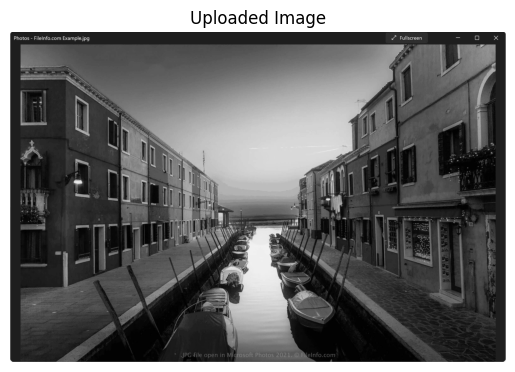

Enter the secret message to hide in the image: hello everyone ? how are you all ?
Embedding text into image and dividing into quadrants...


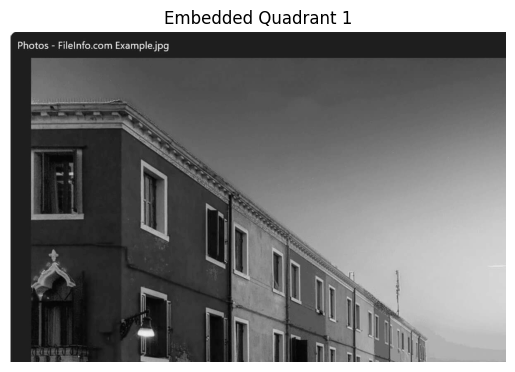

Quadrant 1 downloaded successfully. Saved as embedded_quadrant_1.png


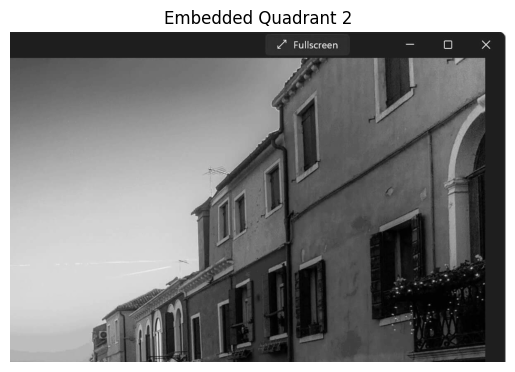

Quadrant 2 downloaded successfully. Saved as embedded_quadrant_2.png


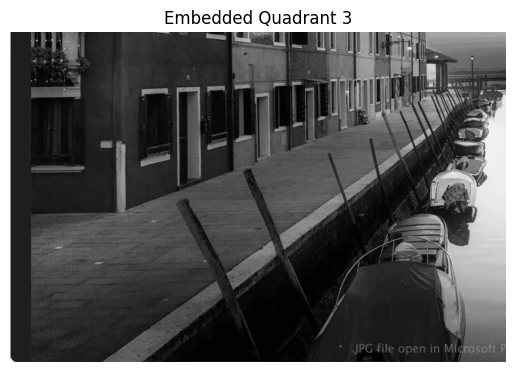

Quadrant 3 downloaded successfully. Saved as embedded_quadrant_3.png


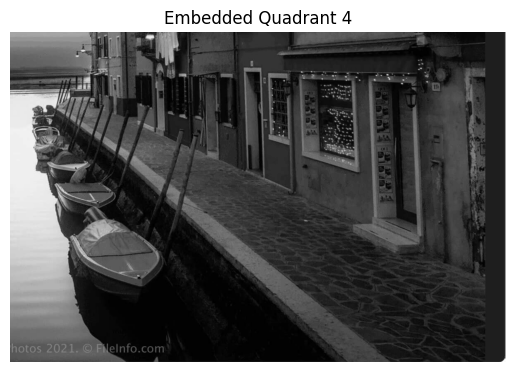

Quadrant 4 downloaded successfully. Saved as embedded_quadrant_4.png


In [ ]:
print("Please upload an image (jpg format).")
image, _ = upload_image()

# Display uploaded image
plt.imshow(image, cmap='gray')
plt.title('Uploaded Image')
plt.axis('off')
plt.show()

# Prompt for Secret Message
text_message = input("Enter the secret message to hide in the image: ")

# Embed text into quadrants and download them
print("Embedding text into image and dividing into quadrants...")
divide_and_embed(image, text_message)
